In [121]:
#Importing the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression  
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importng and loading the dataset
data = pd.read_csv("/Users/teharaperera/Documents/VU/Sem 2/Block 3/BCO7000/Assessment/winemag-data-130k-v2.csv")

#Printing the first few lines of the dataset
data.head()



Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [122]:
#Printing the column names
print(data.columns) 

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [124]:
#Extracting the vintage year of the wines from the 'title' column and creating a new column
data['Vintage(Year)'] = data['title'].str.extract(r'(\d{4})')

#Printing the first few lines of the updated dataset
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery Vintage(Year)  
0     White Blend              Nicosia          2013  
1  Portuguese Red  Quinta dos Avidagos          2011  
2      Pinot Gris            Rainstorm          2013  
3        Riesling           St. Julian          2013  
4      Pinot Noir         Sweet Cheeks          2012

In [125]:
#Printing basic information about our dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
 14  Vintage(Year)          125362 non-nu

In [126]:
#Displaying the dataset summary statistics:
statistics = data.describe()
print(statistics)

          Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000


In [127]:
#Printing all the column names
print(data.columns) 

#Checking the dataset for any missing values: 
missing_values = data.isnull().sum()
print(missing_values)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'Vintage(Year)'],
      dtype='object')
Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
Vintage(Year)             4609
dtype: int64


In [128]:
#Imputation using mode for the categorical values:
categorical_cols = ['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety', 'winery']

for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
    
#Filling the missing values with the median/mode where necessary
data['price'].fillna(data['price'].median(), inplace=True)
data['Vintage(Year)'].fillna(data['Vintage(Year)'].mode()[0], inplace=True)

data = data.drop(['Unnamed: 0'],axis =1)

In [129]:
#Checking the dataset for any missing values and verifying that there are no missing values: 
missing_values = data.isnull().sum() 
print(missing_values)

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
Vintage(Year)            0
dtype: int64


In [130]:
#Checking the data information again for verification:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   region_2               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129971 non-null  object 
 13  Vintage(Year)          129971 non-null  object 
dtypes: float64(1), int64(1), object(12)


In [131]:
#Printing the first few lines of the updated dataset
data.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87   25.0  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                             Reserve      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna      Central Coast       Kerin O’Keefe   
1          Napa Valley      Central Coast          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore      Central Coast  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3            @vossroger  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery Vintage(Year)  
0     White Blend              Nicosia          2013  
1  Portuguese Red  Quinta dos Avidagos          2011  
2      Pinot Gris            Rainstorm          2013  
3        Riesling           St. Julian          2013  
4      Pinot Noir         Sweet Cheeks          2012

In [132]:
#Converting the 'Vintage(Year)' column to an integer value
data['Vintage(Year)'] = data['Vintage(Year)'].astype(int)

In [133]:
#Verifying the data type has been changed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   region_2               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129971 non-null  object 
 13  Vintage(Year)          129971 non-null  int64  
dtypes: float64(1), int64(2), object(11)


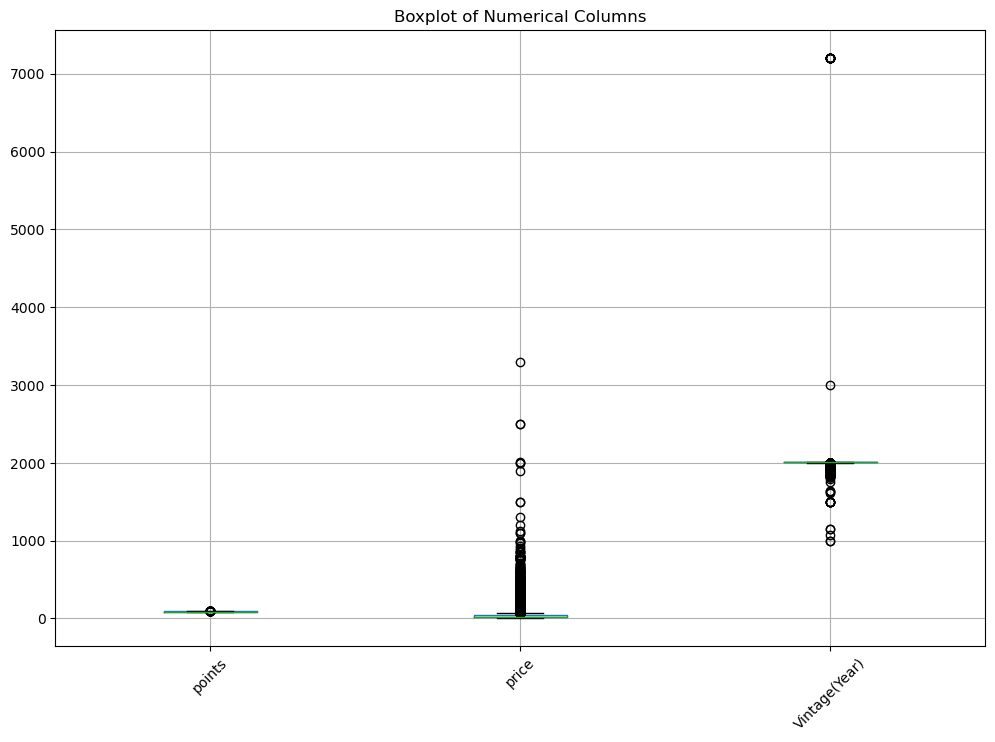

In [134]:
#Selecting only the numerical columns to draw boxplots to identify any outliers in them
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

#Creating the boxplot to check for outliers
plt.figure(figsize=(12, 8))
numerical_columns.boxplot()
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

In [135]:
#Finding the minimum value in the 'price' column
min_price = data['price'].min()

#Finding the maximum value in the 'price' column
max_price = data['price'].max()

#Finding the minimum value in the 'points' column
min_points = data['points'].min()

#Finding the maximum value in the 'points' column
max_points = data['points'].max()

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Minimum Points: {min_points}")
print(f"Maximum Points: {max_points}")


Minimum Price: 4.0
Maximum Price: 3300.0
Minimum Points: 80
Maximum Points: 100


In [136]:
# Creating an interactive box plot
fig = px.box(data, x="variety", y="price", title="Price Distribution by Wine Variety")

# Customising the layout
fig.update_xaxes(categoryorder="total ascending")  # Sort x-axis categories
fig.update_xaxes(title_text="Wine Variety")
fig.update_yaxes(title_text="Price")

# Showing the interactive plot
fig.show()

## Sub-question 1: Linear Regression Analysis

In [137]:
#Identifying which features have a linear relationship with the target variable(price)
correlation_matrix = data.corr()
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)
print(correlation_with_price)

price            1.000000
points           0.399231
Vintage(Year)    0.003191
Name: price, dtype: float64


In [138]:
#Creating a LabelEncoder instance
label_encoder = LabelEncoder()

#Label encoding categorical variables
data['variety_encoded'] = label_encoder.fit_transform(data['variety'])
data['country_encoded'] = label_encoder.fit_transform(data['country'])
data['winery_encoded'] = label_encoder.fit_transform(data['winery'])
data['region1_encoded'] = label_encoder.fit_transform(data['region_1'])
data['region2_encoded'] = label_encoder.fit_transform(data['region_2'])
data['province_encoded'] = label_encoder.fit_transform(data['province'])
data['taster_name_encoded'] = label_encoder.fit_transform(data['taster_name'])
data['designation_encoded'] = label_encoder.fit_transform(data['designation'])
data['taster_twitter_handle_encoded'] = label_encoder.fit_transform(data['taster_twitter_handle'])
data['title_encoded'] = label_encoder.fit_transform(data['title'])

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   country                        129971 non-null  object 
 1   description                    129971 non-null  object 
 2   designation                    129971 non-null  object 
 3   points                         129971 non-null  int64  
 4   price                          129971 non-null  float64
 5   province                       129971 non-null  object 
 6   region_1                       129971 non-null  object 
 7   region_2                       129971 non-null  object 
 8   taster_name                    129971 non-null  object 
 9   taster_twitter_handle          129971 non-null  object 
 10  title                          129971 non-null  object 
 11  variety                        129971 non-null  object 
 12  winery                        

In [140]:
y = data['price']
X = data[['points', 'Vintage(Year)','variety_encoded','country_encoded','winery_encoded','region1_encoded','region2_encoded','province_encoded','taster_name_encoded','designation_encoded','taster_twitter_handle_encoded','title_encoded']] 

#Adding the intercept
X = sm.add_constant(X)

#Fitting the linear regression model
model = sm.OLS(y, X).fit()

#Getting the summary of the regression model
summary = model.summary()

#Printing the summary, to display p-values for each variable
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2182.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:30:52   Log-Likelihood:            -6.5084e+05
No. Observations:              129971   AIC:                         1.302e+06
Df Residuals:                  129958   BIC:                         1.302e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Model with only the p-value variables

Mean Absolute Error (MAE): 13.88
Mean Squared Error (MSE): 1261.36
R-squared (R2): 0.19


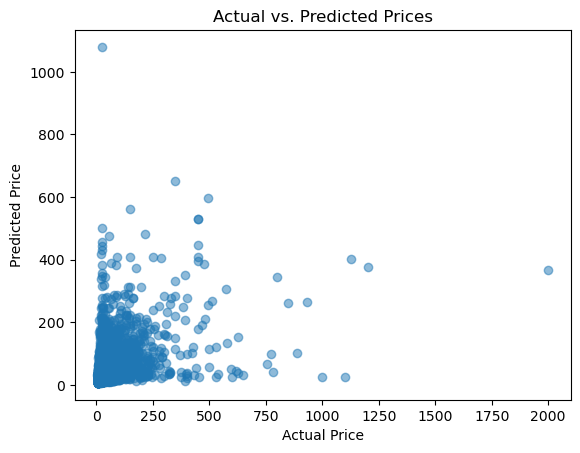

In [141]:
#Regression Random Forest Regressor Model:
#Selecting the features required for the model (you can experiment with additional features)
selected_features = ['country_encoded','winery_encoded','Vintage(Year)','taster_twitter_handle_encoded','title_encoded']

#Extracting the selected features and the target variable
X = data[selected_features]
y = data['price']


#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#Building and training the model using Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=22)
rf_model.fit(X_train, y_train)

#Making the predictions using the trained model
y_pred = rf_model.predict(X_test)

#Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Printing evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

#Visualising the predicted vs. actual prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()

## Model 2 using varibles based on P-values and wine knowledge

Mean Absolute Error (MAE): 12.48
Mean Squared Error (MSE): 1084.76
R-squared (R2): 0.30


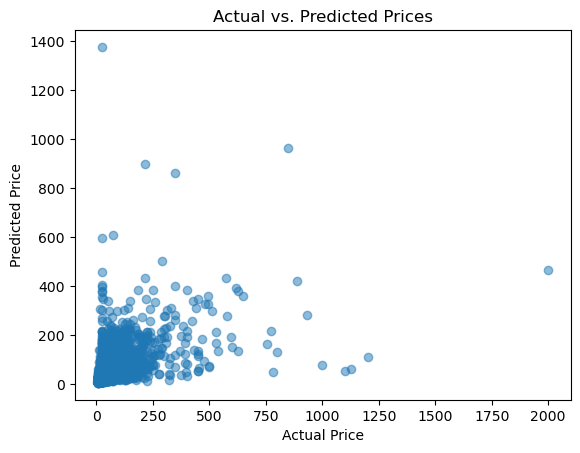

In [142]:
#Regression Random Forest Regressor Model:
#Selecting the features required for the model (you can experiment with additional features)
selected_features = ['points','winery_encoded','Vintage(Year)','variety_encoded','country_encoded']

#Extracting the selected features and the target variable
X = data[selected_features]
y = data['price']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#Building and training the model using Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=22)
rf_model.fit(X_train, y_train)

#Making the predictions using the trained model
y_pred = rf_model.predict(X_test)

#Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Printing the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

#Visualising the predicted vs. actual prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()

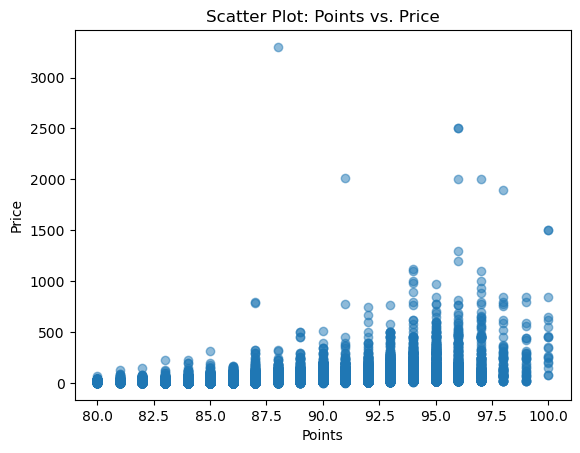

In [143]:
#Plotting the scatter plot for price vs points
import matplotlib.pyplot as plt

plt.scatter(data['points'], data['price'], alpha=0.5)
plt.xlabel('Points')
plt.ylabel('Price')
plt.title('Scatter Plot: Points vs. Price')
plt.show()

In [144]:
data.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87   25.0  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                             Reserve      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna      Central Coast       Kerin O’Keefe   
1          Napa Valley      Central Coast          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore      Central Coast  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle  ... variety_encoded country_encoded winery_encoded  \
0          @kerinokeefe  ...             690              22          11608   
1            @vossroger  ...             450              31          12956   
2           @paulgwine   ...             436              40          13018   
3            @vossroger  ...             479              40          14390   
4           @paulgwine   ...             440              40          14621   

   region1_encoded  region2_encoded  province_encoded  taster_name_encoded  \
0              424                1               331                    9   
1              746                1               108                   15   
2             1217               16               268                   14   
3              549                1               218                    0   
4             1217               16               268                   14   

   designation_encoded  taster_twitter_handle_encoded  title_encoded  
0                36805                              4          79521  
1                 2325                             10          89368  
2                27873                              7          89782  
3                27974                             10         100878  
4                36465                              7         102810  

[5 rows x 24 columns]

### Making Predictions using the selected Model(Model 2)

In [158]:
#Defining the varieties for the following wines:
varieties_to_find = ['Pinot Noir', 'Chardonnay', 'Merlot']

#Creating a dictionary to store the variety names and their encoded values
encoded_varieties = {}

#Iterating through the dataset to find the encoded values
for variety in varieties_to_find:()
    encoded_value = data[data['variety'] == variety]['variety_encoded'].values[0]
    encoded_varieties[variety] = encoded_value

#Printing the encoded values for the specified varieties
for variety, encoded_value in encoded_varieties.items():
    print(f"{variety}: Encoded Value - {encoded_value}")


Pinot Noir: Encoded Value - 440
Chardonnay: Encoded Value - 125
Merlot: Encoded Value - 326


In [163]:
#Defining the features for the predictions:
predictions = {
    'points': [84, 87, 87],
    'winery_encoded': [11608, 12956, 13018],  
    'Vintage(Year)': [2012, 2012, 2012],
    'variety_encoded': [440, 125, 326],  
    'country_encoded': [22, 31, 40],  
}

#Creating a DataFrame from the new data
predictions_df = pd.DataFrame(predictions)

#Using the trained model to make predictions from our model:
predictions = rf_model.predict(predictions_df)

#Defining a dictionary to map variety_encoded values to variety names
variety_encoded_to_name = {440: 'Pinot Noir', 125: 'Chardonnay', 326: 'Merlot'}

#Printing the predicted prices
for i, predicted_price in enumerate(predictions):
    variety_encoded = predictions_df['variety_encoded'].iloc[i]
    variety_name = variety_encoded_to_name.get(variety_encoded, 'Unknown')
    print(f"Predicted Price for Sample {i+1} ({variety_name}): ${predicted_price:.2f}")


Predicted Price for Sample 1 (Pinot Noir): $21.55
Predicted Price for Sample 2 (Chardonnay): $20.64
Predicted Price for Sample 3 (Merlot): $21.59


### Exploring the Data and Visualising Insights

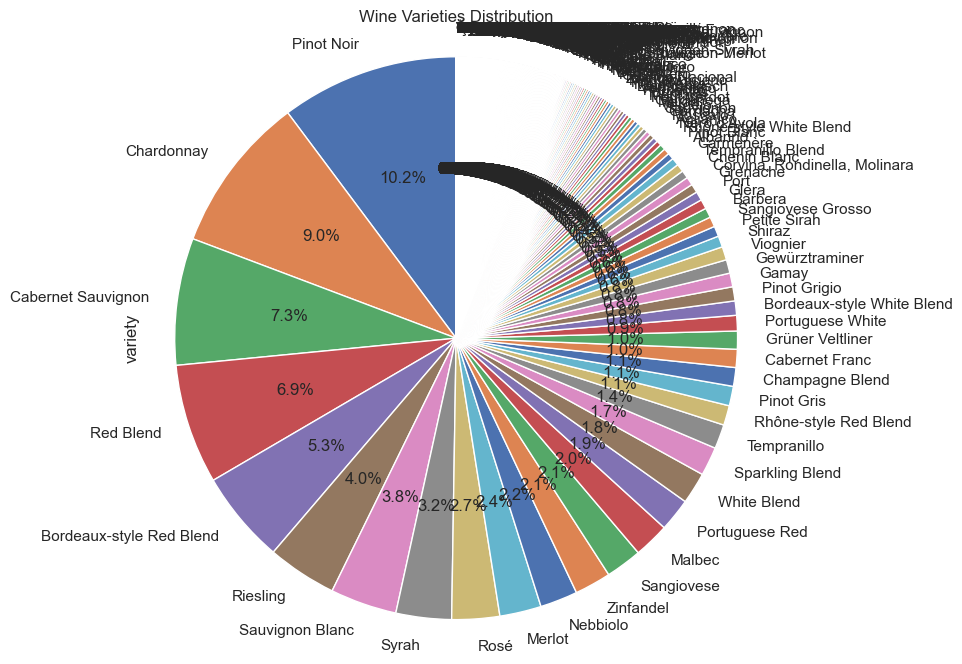

In [212]:
#Exploring the perecentage of different varieties of wines
#Setting the style for plots
sns.set(style='whitegrid')

#Visualising the different wine varieties 
plt.figure(figsize=(8, 8))
data['variety'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Wine Varieties Distribution')
plt.axis('equal')
plt.show()

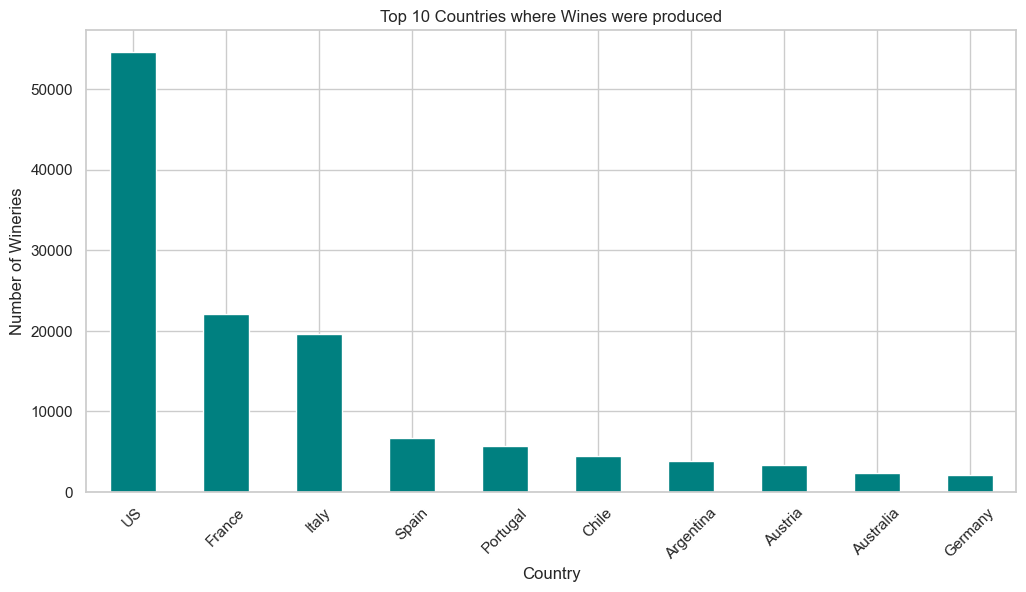

In [249]:
#Visualising the top 10 countries based on the number of wineries
#Grouping the data by country and counting the number of wineries in each country
winery_counts_by_country = data['country'].value_counts()

#Selecting the top 10 countries to display
top_countries = winery_counts_by_country.head(10)

bar_color = 'teal'

#Creating a bar chart to visualise the winery counts by country
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color=bar_color)
plt.title('Top 10 Countries where Wines were produced')
plt.xlabel('Country')
plt.ylabel('Number of Wineries')
plt.xticks(rotation=45)
plt.show()


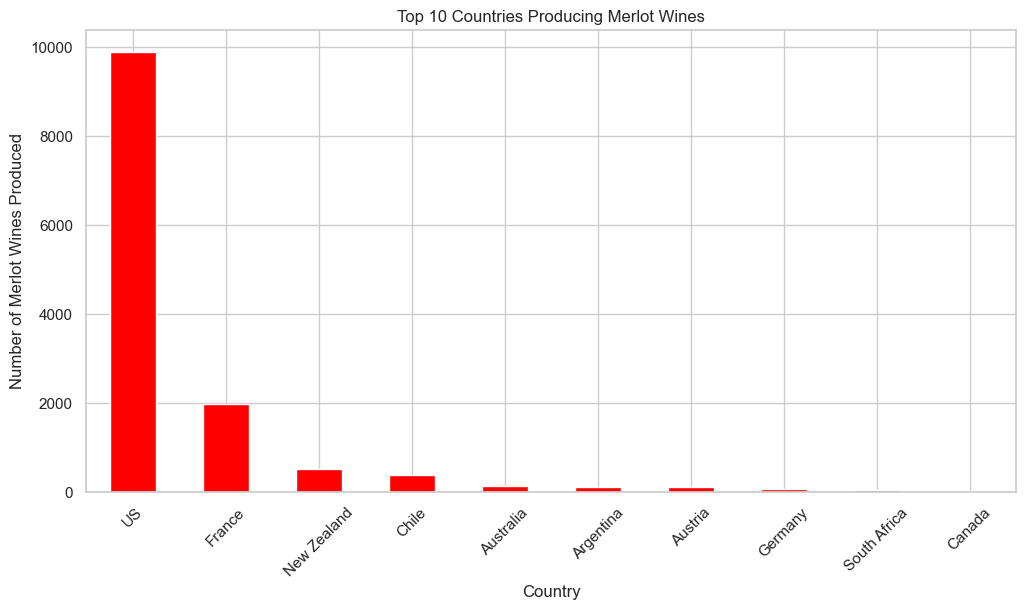

In [252]:
#Top countries that produce merlot wines
#Filtering the dataset to include only Merlot wines
merlot_data = data[data['variety'] == 'Merlot']

#Grouping the Merlot data by country and count the number of Merlot wines in each country
merlot_counts_by_country = merlot_data['country'].value_counts()

#Selecting the top 10 countries to display 
top_countries = merlot_counts_by_country.head(10)
bar_color = 'red'

#Creating a bar chart to visualize Merlot counts by country
plt.figure(figsize=(12, 6))
top_pinot_noir_countries.plot(kind='bar', color=bar_color)
plt.title('Top 10 Countries Producing Merlot Wines')
plt.xlabel('Country')
plt.ylabel('Number of Merlot Wines Produced')
plt.xticks(rotation=45)
plt.show()


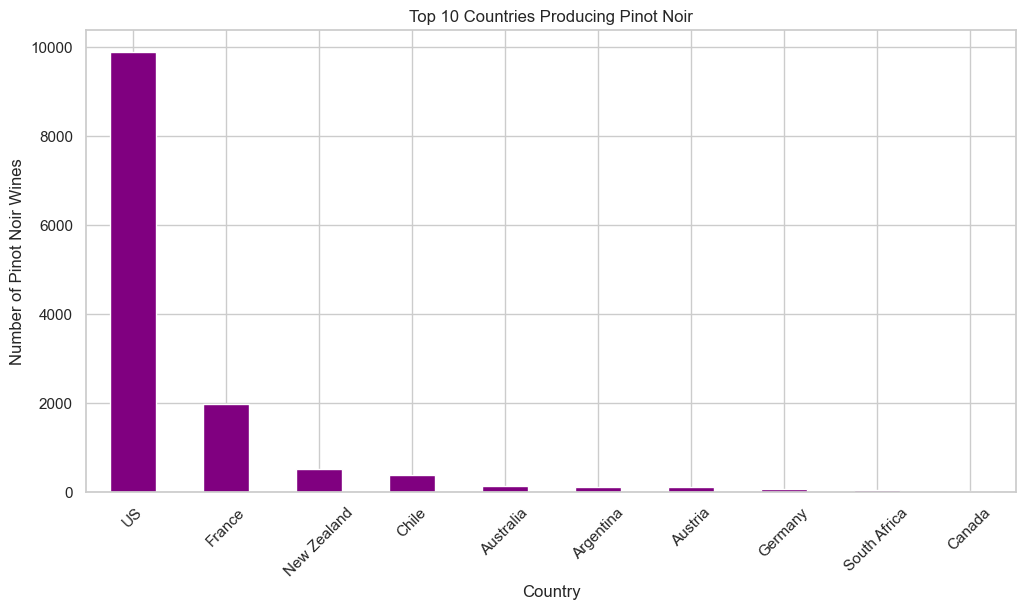

In [251]:
#Filtering the dataset to include only Pinot Noir wines
pinot_noir_data = data[data['variety'] == 'Pinot Noir']

#Grouping the filtered data by country and counting the number of Pinot Noir wines in each country
pinot_noir_counts_by_country = pinot_noir_data['country'].value_counts()

#Selecting the top 10 countries
top_pinot_noir_countries = pinot_noir_counts_by_country.head(10)
bar_color = 'purple'

#Creating a bar chart to visualize the top 10 countries producing Pinot Noir
plt.figure(figsize=(12, 6))
top_pinot_noir_countries.plot(kind='bar', color=bar_color)
plt.title('Top 10 Countries Producing Pinot Noir')
plt.xlabel('Country')
plt.ylabel('Number of Pinot Noir Wines')
plt.xticks(rotation=45)
plt.show()


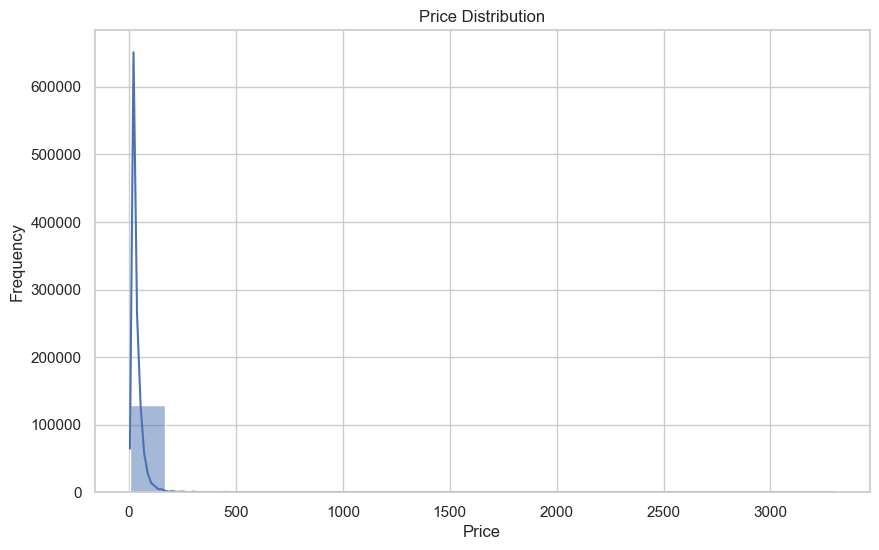

In [224]:
#Visualising the price distribution of the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [228]:
#Finding the Average Price for Each Wine Variety 
#Grouping the data by 'variety' and calculating the average price
variety_avg_price = data.groupby('variety')['price'].mean().reset_index()

#Sorting the data by average price
variety_avg_price = variety_avg_price.sort_values(by='price', ascending=False)

#Creating the interactive bar chart
fig = px.bar(variety_avg_price, x='price', y='variety', orientation='h', text='price',
             labels={'price': 'Average Price', 'variety': 'Wine Variety'},
             title='Average Price for Each Wine Variety')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  

fig.update_layout(xaxis_title='Average Price', yaxis_title='Wine Variety')

fig.show()


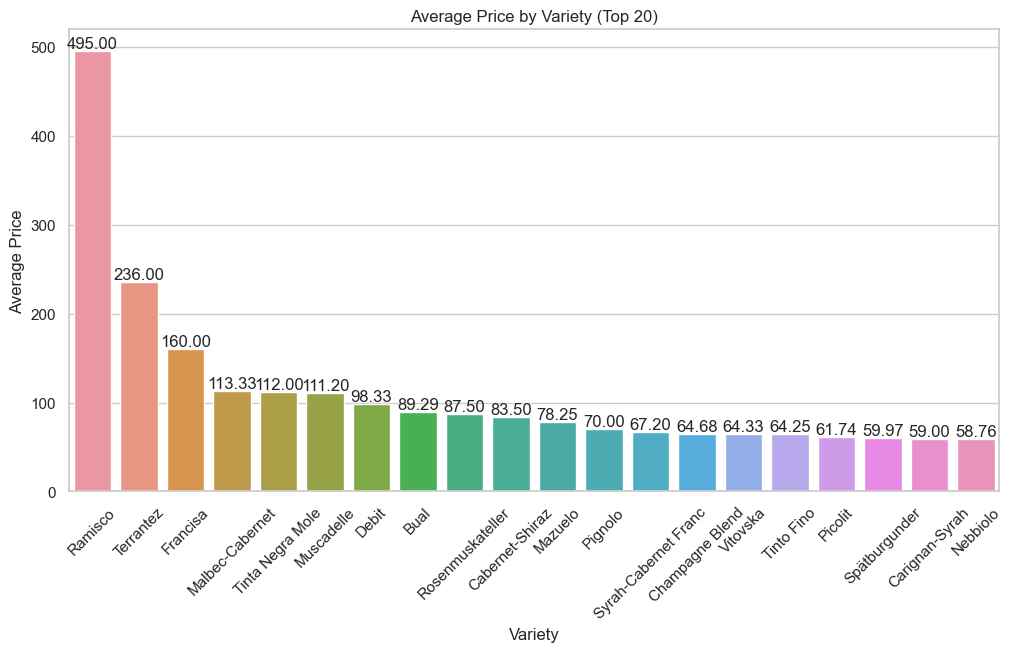

In [234]:
#Plotting the average price by variety for the top 20 
plt.figure(figsize=(12, 6))
average_price_by_variety = data.groupby('variety')['price'].mean().sort_values(ascending=False)
ax = sns.barplot(x=average_price_by_variety.index[:20], y=average_price_by_variety.values[:20])
plt.title('Average Price by Variety (Top 20)')
plt.xticks(rotation=45)
plt.xlabel('Variety')
plt.ylabel('Average Price')

#Adding values to the bars
for i, v in enumerate(average_price_by_variety.values[:20]):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


In [248]:
#Finding the Top 10 Wine Varieties by Maximum Price
#Grouping the data by 'variety' and finding the maximum price for each variety
variety_max_price = data.groupby('variety')['price'].max().reset_index()

#Sorting the data by maximum price in descending order
variety_max_price = variety_max_price.sort_values(by='price', ascending=False)

#Select the top N varieties with the highest maximum prices
top_n = 10
top_varieties = variety_max_price.head(top_n)

#Creating the interactive bar chart for the top varieties and their maximum prices
fig = px.bar(top_varieties, x='price', y='variety', orientation='h', text='price',
             labels={'price': 'Maximum Price', 'variety': 'Wine Variety'},
             title=f'Top {top_n} Wine Varieties by Maximum Price')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_color='orange')

fig.update_layout(xaxis_title='Maximum Price', yaxis_title='Wine Variety')

fig.show()


In [193]:
#Finding the Top 10 Wine Varieties by Minimum Price
# Grouping the data by 'variety' and finding the minimum price for each variety
variety_min_price = data.groupby('variety')['price'].min().reset_index()

# Sorting the data by minimum price in ascending order
variety_min_price = variety_min_price.sort_values(by='price', ascending=True)

# Select the top N varieties with the lowest minimum prices
top_n = 10
top_varieties = variety_min_price.head(top_n)

# Creating the interactive bar chart for the top varieties and their minimum prices
fig = px.bar(top_varieties, x='price', y='variety', orientation='h', text='price',
             labels={'price': 'Minimum Price', 'variety': 'Wine Variety'},
             title=f'Top {top_n} Wine Varieties by Minimum Price')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  

fig.update_layout(xaxis_title='Minimum Price', yaxis_title='Wine Variety')

fig.show()

## Sub-question 2: Classification Model

In [172]:
#Subquestion 2:
#Defining the criteria for labeling wines as "premium choices" (1) and "value picks" (0)
#We have considered wines with a price above $200 as "premium choices" and those below as "value picks"
data['target'] = (data['price'] > 200).astype(int)

#Selecting the features to build the model
features = ['points', 'price', 'variety']  

#Creating a pipeline for preprocessing and modeling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['points', 'price']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['variety'])  
    ])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

X = data[features]
y = data['target']

#Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#Building and training the classification model
pipeline.fit(X_train, y_train)

#Making predictions on the testing set
y_pred = pipeline.predict(X_test)

#Evaluating the built model
accuracy = accuracy_score(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_text)
print("Confusion Matrix:\n", confusion)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25860
           1       1.00      0.99      1.00       135

    accuracy                           1.00     25995
   macro avg       1.00      1.00      1.00     25995
weighted avg       1.00      1.00      1.00     25995

Confusion Matrix:
 [[25860     0]
 [    1   134]]


/Users/teharaperera/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Making Predictions

In [173]:
#Defining some sample wine data to make predictions
wine_samples = [
    {'points': 90, 'price': 30, 'variety': 'Chardonnay'},
    {'points': 88, 'price': 60, 'variety': 'Pinot Noir'},
    {'points': 85, 'price': 20, 'variety': 'Merlot'},
]

#Creating a DataFrame for the sample data
sample_data = pd.DataFrame(wine_samples)
# Using the trained model to make predictions for the sample data
predicted_labels = pipeline.predict(sample_data)

for i, (predicted_label, row) in enumerate(zip(predicted_labels, sample_data.iterrows())):
    wine_type = "premium choice" if predicted_label == 1 else "value pick"
    points = row[1]['points']
    variety = row[1]['variety']
    price = row[1]['price']
    print(f"Wine {i + 1}: {variety} ({points} points) with a price of ${price:.2f} is predicted to be a {wine_type}.")

Wine 1: Chardonnay (90 points) with a price of $30.00 is predicted to be a value pick.
Wine 2: Pinot Noir (88 points) with a price of $60.00 is predicted to be a value pick.
Wine 3: Merlot (85 points) with a price of $20.00 is predicted to be a value pick.


### Displaying all the value pick and premium wines for each variety

In [174]:
#Displaying all the value pick and premium wines for each variety: 
#Getting the unique wine varieties from the dataset
unique_varieties = data['variety'].unique()

#Defining the categorization criteria for different varieties
criteria = {}

for variety in unique_varieties:
    #Setting the criteria for all varieties
    criteria[variety] = {'Premium': (201, 4000), 'Value': (0, 200)}

#Creating an empty DataFrames to store results
value_picks = pd.DataFrame(columns=data.columns)
premium_wines = pd.DataFrame(columns=data.columns)

#Looping through each unique variety and categorize wines
for variety, variety_data in data.groupby('variety'):
    if variety in criteria:
        premium_criteria = criteria[variety]['Premium']
        value_criteria = criteria[variety]['Value']
        premium_mask = (variety_data['price'] > premium_criteria[1])
        value_mask = (variety_data['price'] >= value_criteria[0]) & (variety_data['price'] <= value_criteria[1])
        
        #Filtering the wines into value picks and premium wines
        value_picks = pd.concat([value_picks, variety_data[value_mask]])
        premium_wines = pd.concat([premium_wines, variety_data[premium_mask]])

#Displaying the main variety, value pick wines, premium wines, and Vintage year
for variety in unique_varieties:
    if variety in criteria:
        print(f"\nVariety: {variety}")
        print("Value Picks:")
        print(value_picks[value_picks['variety'] == variety][['variety', 'price', 'Vintage(Year)']])
        print("\nPremium Wines:")
        print(premium_wines[premium_wines['variety'] == variety][['variety', 'price', 'Vintage(Year)']])


Variety: White Blend
Value Picks:
            variety  price Vintage(Year)
0       White Blend   25.0          2013
22      White Blend   19.0          2007
26      White Blend   13.0          2013
32      White Blend   25.0          2011
105     White Blend   14.0          2015
...             ...    ...           ...
129841  White Blend   10.0          2008
129884  White Blend   43.0          2009
129899  White Blend   30.0          2015
129933  White Blend   46.0          2005
129939  White Blend   70.0          2004

[2359 rows x 3 columns]

Premium Wines:
Empty DataFrame
Columns: [variety, price, Vintage(Year)]
Index: []

Variety: Portuguese Red
Value Picks:
               variety  price Vintage(Year)
1       Portuguese Red   15.0          2011
157     Portuguese Red   26.0          2013
203     Portuguese Red   28.0          2012
217     Portuguese Red   20.0          2013
473     Portuguese Red   34.0          2010
...                ...    ...           ...
129671  Portuguese 

### Printing the premium and value pick prices for each wine variety with user input

In [171]:
#Getting the unique wine varieties from the dataset
unique_varieties = data['variety'].unique()

#Defining the categorization criteria for different varieties
criteria = {}

for variety in unique_varieties:
    # Set criteria for all varieties
    criteria[variety] = {'Value': (0, 200), 'Premium': (201, 4000)}

#Prompting the user to enter the wine variety they want to check the prices
user_variety = input("Enter the wine variety: ")

#Checking if the user-specified variety exists in the dataset
if user_variety in unique_varieties:
    print(f"\nVariety: {user_variety}")

    #Filtering the wines based on user-specified variety
    user_variety_data = data[data['variety'] == user_variety]

    #Applying the adjusted categorization criteria to the user-specified variety
    premium_criteria = criteria[user_variety]['Premium']
    value_criteria = criteria[user_variety]['Value']
    premium_mask = (user_variety_data['price'] >= premium_criteria[0]) & (user_variety_data['price'] <= premium_criteria[1])
    value_mask = (user_variety_data['price'] >= value_criteria[0]) & (user_variety_data['price'] <= value_criteria[1])

    #Displaying premium and value pick wines for the specified variety
    print("\nPremium Wines:")
    print(user_variety_data[premium_mask][['price', 'Vintage(Year)']])

    print("\nValue Picks:")
    print(user_variety_data[value_mask][['price', 'Vintage(Year)']])
else:
    print(f"The wine variety '{user_variety}' is not found in the dataset.")

Enter the wine variety: Pinot Noir

Variety: Pinot Noir

Premium Wines:
        price  Vintage(Year)
357     350.0           2013
3069    205.0           2008
6730    285.0           2007
6731    280.0           2008
8891    250.0           2009
...       ...            ...
120440  279.0           2014
120594  250.0           2008
120595  236.0           2009
121944  360.0           2015
127566  350.0           2008

[123 rows x 2 columns]

Value Picks:
        price  Vintage(Year)
4        65.0           2012
21       20.0           2013
25       69.0           2011
35       50.0           2010
41       22.0           2009
...       ...            ...
129920   48.0           2006
129931  107.0           2005
129936   66.0           2005
129960   48.0           2006
129967   75.0           2004

[13150 rows x 2 columns]


### Exploring the Data and Visualising Insights

In [201]:
#Plotting the top 10 value picks for Merlot
#Filtering the value picks for Merlot wines
merlot_value_picks = value_picks[value_picks['variety'] == 'Merlot']

#Removing duplicate wines to show only unique values
unique_merlot_value_picks = merlot_value_picks.drop_duplicates(subset='title')

#Sorting by price 
top_10_unique_merlot_value_picks = unique_merlot_value_picks.sort_values(by='price', ascending=True).head(10)

#Creating the bar chart to visualize the top 10 unique value pick Merlot wines
fig = px.bar(top_10_unique_merlot_value_picks, x='price', y='title',
             labels={'price': 'Price', 'title': 'Wine Title'},
             title='Top 10 Unique Value Picks for Merlot Wines')

fig.show()


In [207]:
user_variety = 'Merlot'

#Checking if the specified variety exists in the dataset
if user_variety in criteria:
    print(f"\nVariety: {user_variety}")

    #Filtering the wines
    user_variety_data = data[data['variety'] == user_variety]

    #Applying the adjusted categorisation criteria
    premium_criteria = criteria[user_variety]['Premium']
    premium_mask = (user_variety_data['price'] >= premium_criteria[0]) & (user_variety_data['price'] <= premium_criteria[1])

    #Getting the unique premium picks for Merlot wines
    unique_premium_merlots = user_variety_data[premium_mask].drop_duplicates(subset='title')

    #Sorting by price 
    top_10_unique_premium_merlots = unique_premium_merlots.sort_values(by='price', ascending=True).head(10)

    #Creating a bar chart to visualize the top 10 unique premium picks for Merlot wines
    fig = px.bar(top_10_unique_premium_merlots, x='price', y='title',
                 labels={'price': 'Price', 'title': 'Wine Title'},
                 title=f'Top 10 Unique Premium Picks for {user_variety} Wines')

    fig.show()
else:
    print(f"The wine variety '{user_variety}' is not found in the dataset.")



Variety: Merlot


In [209]:
user_variety = 'Pinot Noir'

#Checking if the specified variety exists in the dataset
if user_variety in criteria:
    print(f"\nVariety: {user_variety}")

    #Filtering the wines
    user_variety_data = data[data['variety'] == user_variety]

    #Applying the adjusted categorisation criteria 
    value_criteria = criteria[user_variety]['Value']
    value_mask = (user_variety_data['price'] >= value_criteria[0]) & (user_variety_data['price'] <= value_criteria[1])

    #Getting the unique value picks
    unique_value_pinot_noirs = user_variety_data[value_mask].drop_duplicates(subset='title')

    #Sorting by price
    top_10_unique_value_pinot_noirs = unique_value_pinot_noirs.sort_values(by='price', ascending=True).head(10)

    #Creating a bar chart to visualize the top 10 unique value picks for Pinot Noir wines
    fig = px.bar(top_10_unique_value_pinot_noirs, x='price', y='title',
                 labels={'price': 'Price', 'title': 'Wine Title'},
                 title=f'Top 10 Unique Value Picks for {user_variety} Wines')

    fig.show()
else:
    print(f"The wine variety '{user_variety}' is not found in the dataset.")



Variety: Pinot Noir


In [210]:
user_variety = 'Pinot Noir'

#Checking if the specified variety exists in the dataset
if user_variety in criteria:
    print(f"\nVariety: {user_variety}")

    #Filtering the wines
    user_variety_data = data[data['variety'] == user_variety]

    #Applying the adjusted categorisation criteria
    premium_criteria = criteria[user_variety]['Premium']
    premium_mask = (user_variety_data['price'] >= premium_criteria[0]) & (user_variety_data['price'] <= premium_criteria[1])

    #Getting the unique premium picks for the Pinot Noir wines
    unique_premium_pins = user_variety_data[premium_mask].drop_duplicates(subset='title')

    #Sorting by price 
    top_10_unique_premium_pins = unique_premium_pins.sort_values(by='price', ascending=False).head(10)

    #Creating a bar chart to visualize the top 10 unique premium picks for Pinot Noir
    fig = px.bar(top_10_unique_premium_pins, x='price', y='title',
                 labels={'price':  'Price', 'title': 'Wine Title'},
                 title=f'Top 10 Unique Premium Picks for {user_variety} Wines')

    fig.show()
else:
    print(f"The wine variety '{user_variety}' is not found in the dataset.")



Variety: Pinot Noir


In [211]:
# Specify the wine varieties you want to compare (e.g., Merlot and Pinot Noir)
user_varieties = ['Merlot', 'Pinot Noir']

# Create an empty DataFrame to store the top 10 unique value picks for each variety
top_10_value_picks = pd.DataFrame(columns=data.columns)

# Loop through the specified varieties and find the top 10 unique value picks for each
for user_variety in user_varieties:
    if user_variety in criteria:

        # Filter the wines based on the user-specified variety
        user_variety_data = data[data['variety'] == user_variety]

        # Apply the adjusted categorization criteria to the user-specified variety
        value_criteria = criteria[user_variety]['Value']
        value_mask = (user_variety_data['price'] >= value_criteria[0]) & (user_variety_data['price'] <= value_criteria[1])

        # Get the unique value picks for the specified variety
        unique_value_variety = user_variety_data[value_mask].drop_duplicates(subset='title')

        # Sort by price in ascending order to get the lowest-priced value picks
        top_10_unique_value_variety = unique_value_variety.sort_values(by='price', ascending=True).head(10)

        # Append the top 10 value picks for the variety to the DataFrame
        top_10_value_picks = top_10_value_picks.append(top_10_unique_value_variety)

# Create a bar chart to compare the top 10 unique value picks for Merlot and Pinot Noir wines
fig = px.bar(top_10_value_picks, x='price', y='title', color='variety',
             labels={'price': 'Price', 'title': 'Wine Title', 'variety': 'Variety'},
             title='Top 10 Unique Value Picks Comparison: Merlot vs. Pinot Noir')

fig.show()


/var/folders/xn/7_sfzjpx33dgh9q54vw410m80000gn/T/ipykernel_21702/247595819.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/xn/7_sfzjpx33dgh9q54vw410m80000gn/T/ipykernel_21702/247595819.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

